<a href="https://colab.research.google.com/github/jeevan-nagendra/Brain_tumor_detection/blob/main/Brain_Tumor_with_CNN%2CRESNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Import all the required Libraries for image pre-Processing,building modela and evaluating results.**



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
import keras
from keras.models import Sequential,Model
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,UpSampling2D
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from sklearn.model_selection import train_test_split

Merging all the testing and training together.

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing/glioma_tumor/image(15).jpg
/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing/glioma_tumor/image(1).jpg
/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing/glioma_tumor/image(16).jpg
/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing/glioma_tumor/image(10).jpg
/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing/glioma_tumor/image(2).jpg
/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing/glioma_tumor/image(17).jpg
/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing/glioma_tumor/image(12).jpg
/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing/glioma_tumor/image(11).jpg
/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing/glioma_tumor/image(19).jpg
/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing/glioma_tumor/image(14).jpg
/content/drive/MyDrive/Brain_tum

Data Preperation

In [ ]:

labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
X_train = []
y_train = []
image_size = 128
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
#We start off by appending all the images from the directories into a Python list and then converting them into numpy arrays after resizing it.

100%|██████████| 74/74 [00:48<00:00,  1.54it/s]


Shuffling images 

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)
X_train.shape


(3264, 128, 128, 3)

Spliting data into Training and testing of 70% training and 30% testing



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [ ]:
print(X_test.shape)
print(X_train.shape)

(327, 128, 128, 3)
(2937, 128, 128, 3)


dividing into different categories

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
import tensorflow as tf


Convolutional Neural Network Classifier

In [ ]:


model_1 = Sequential()
model_1.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(128,128,3)))
model_1.add(Conv2D(64,(3,3),activation='relu'))
model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.3))
model_1.add(Conv2D(64,(3,3),activation='relu'))
model_1.add(Conv2D(64,(3,3),activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.3))
model_1.add(Conv2D(128,(3,3),activation='relu'))
model_1.add(Conv2D(128,(3,3),activation='relu'))
model_1.add(Conv2D(128,(3,3),activation='relu'))
model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.3))
model_1.add(Conv2D(128,(3,3),activation='relu'))
model_1.add(Conv2D(256,(3,3),activation='relu'))
model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.3))
model_1.add(Flatten())
model_1.add(Dense(512,activation = 'relu'))
model_1.add(Dense(512,activation = 'relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(4,activation='softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        36928     
                                                        

Compile the model with categorical cross entropy used for categorical data with adam optimizer

In [ ]:
model_1.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history1 = model_1.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 21s 86ms/step - loss: 1.7380 - accuracy: 0.2898 - val_loss: 1.3568 - val_accuracy: 0.2891
Epoch 2/20
83/83 [==============================] - 6s 67ms/step - loss: 1.2451 - accuracy: 0.4230 - val_loss: 1.1814 - val_accuracy: 0.4048
Epoch 3/20
83/83 [==============================] - 6s 71ms/step - loss: 1.0464 - accuracy: 0.5475 - val_loss: 0.9844 - val_accuracy: 0.5510
Epoch 4/20
83/83 [==============================] - 6s 68ms/step - loss: 0.9343 - accuracy: 0.5989 - val_loss: 0.9498 - val_accuracy: 0.5816
Epoch 5/20
83/83 [==============================] - 6s 70ms/step - loss: 0.8590 - accuracy: 0.6156 - val_loss: 0.8590 - val_accuracy: 0.6224
Epoch 6/20
83/83 [==============================] - 6s 69ms/step - loss: 0.7010 - accuracy: 0.7162 - val_loss: 0.8451 - val_accuracy: 0.6361
Epoch 7/20
83/83 [==============================] - 6s 70ms/step - loss: 0.6421 - accuracy: 0.7416 - val_loss: 0.6369 - val_accuracy: 0.7109
Epoch 8/20
8

Having a look at validation accuracy and loss of CNN model


In [ ]:
val_error,val_accuracy = model_1.evaluate(X_test,y_test)
print("Value error of model 1", val_error)
print("Val Accuracy of model 1", val_accuracy)


11/11 [==============================] - 0s 36ms/step - loss: 0.3204 - accuracy: 0.8930
Value error of model 1 0.32043689489364624
Val Accuracy of model 1 0.8929663896560669


Code for plotting loss and accuracy for evaluation of the trained model

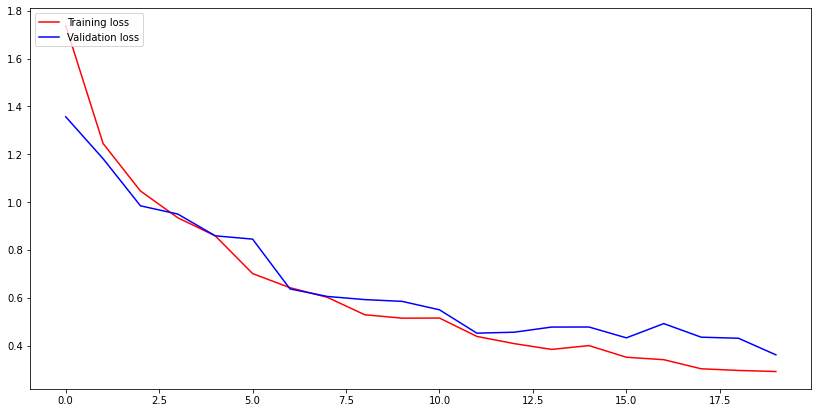

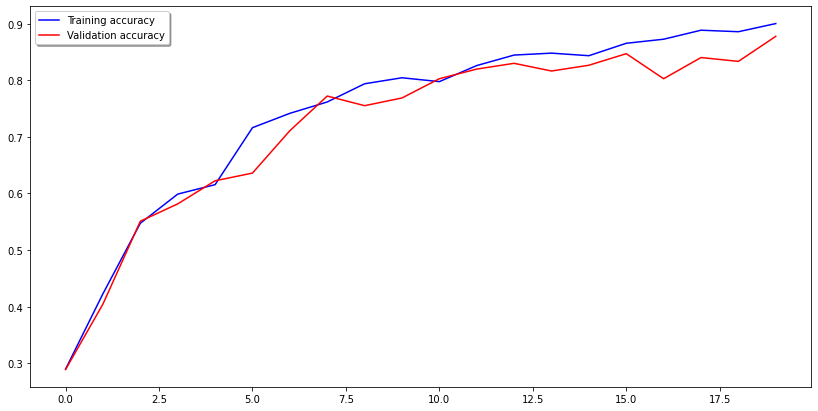

In [ ]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()
fig = plt.figure(figsize=(14,7))
plt.plot(history1.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.show()

Prediction

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing/no_tumor/image(101).jpg')
img = cv2.resize(img,(128,128))
img_array = np.array(img)
img_array.shape

(128, 128, 3)

Reshaping a data and adding to array for computation

In [ ]:
img_array = img_array.reshape(1,128,128,3)
img_array.shape
print(img_array)

[[[[36 36 36]
   [36 36 36]
   [36 36 36]
   ...
   [33 33 33]
   [33 33 33]
   [33 33 33]]

  [[25 25 25]
   [25 25 25]
   [25 25 25]
   ...
   [31 31 31]
   [31 31 31]
   [31 31 31]]

  [[22 22 22]
   [22 22 22]
   [22 22 22]
   ...
   [28 28 28]
   [28 28 28]
   [28 28 28]]

  ...

  [[13 13 13]
   [13 13 13]
   [13 13 13]
   ...
   [14 14 14]
   [14 14 14]
   [14 14 14]]

  [[12 12 12]
   [12 12 12]
   [12 12 12]
   ...
   [14 14 14]
   [14 14 14]
   [14 14 14]]

  [[11 11 11]
   [11 11 11]
   [11 11 11]
   ...
   [14 14 14]
   [14 14 14]
   [14 14 14]]]]


Prediction 

In [ ]:
pred_1 = model_1.predict(X_test)
pred_1 = np.argmax(pred_1,axis=1)
y_test_new_1 = np.argmax(y_test,axis=1)

11/11 [==============================] - 0s 14ms/step


this function returns all the hyperparameters values

In [ ]:
print(classification_report(y_test_new_1,pred_1))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        93
           1       0.89      0.94      0.91        51
           2       0.89      0.77      0.83        96
           3       0.98      0.95      0.97        87

    accuracy                           0.89       327
   macro avg       0.90      0.90      0.90       327
weighted avg       0.90      0.89      0.89       327



assignment of colors for different intensities in confusion matrix

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

Plotting confusion matrix for CNN model

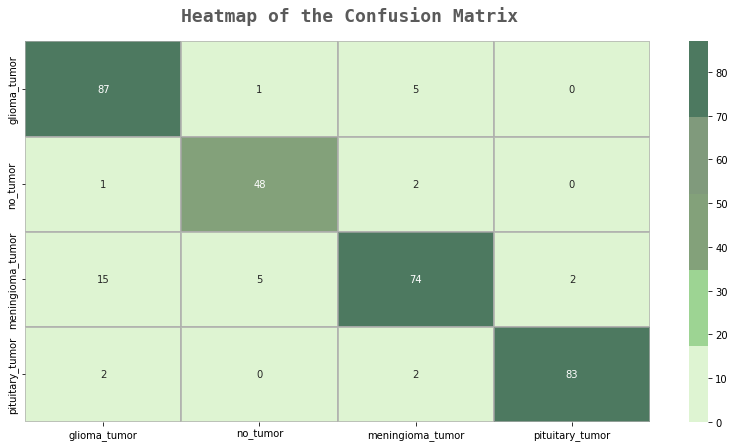

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred_1),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()


Input path of random MRI image of brain to predict the presence of different types of brain tumor.

1/1 [==============================] - 0s 20ms/step


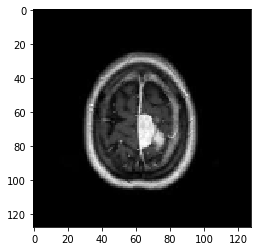

Brain Tumor is present.
The varient is Meningioma Tumor 


In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing/meningioma_tumor/image(89).jpg')
img1 = cv2.resize(img1,(128,128))
img_array1 = np.array(img1)
img_array1 = img_array1.reshape(1,128,128,3)
img_array1.shape
a=model_1.predict(img_array1)
indices1 = a.argmax()
plt.imshow(img1,interpolation='nearest')
plt.show()
if indices1 == 0:
  print("Brain Tumor is present. \nThe varient is Glioma Tumor ")
elif (indices1 == 2):
  print("Brain Tumor is present.\nThe varient is Meningioma Tumor ")
elif (indices1 == 1):
  print("No brain Tumor./n {} ")
else:
  print("Brain Tumor is present.\nThe varient is Pituitary Tumor ")


In [ ]:
#ResNet152 classifier

Image Data Augmentation: Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. It uses techniques such as flipping, zooming, padding, cropping, etc.

Data augmentation makes the model more robust to slight variations, and hence prevents the model from overfitting.

To do so using Keras, we use the function ImageDataGenerator


Dividing the dataset into Training and Testing sets.

Performing One Hot Encoding on the labels after converting it into numerical values:

Transfer Learning
Deep convolutional neural network models may take days or even weeks to train on very large datasets.

A way to short-cut this process is to re-use the model weights from pre-trained models that were developed for standard computer vision benchmark datasets, such as the ImageNet image recognition tasks. Top performing models can be downloaded and used directly, or integrated into a new model for your own computer vision problems.

In this notebook, I'll be using the EfficientNetB0 model which will use the weights from the ImageNet dataset.

The include_top parameter is set to False so that the network doesn't include the top layer/ output layer from the pre-built model which allows us to add our own output layer depending upon our use case!

In [ ]:
from tensorflow.keras.applications import ResNet152V2
resnet = ResNet152V2(weights='imagenet', include_top=False,input_shape=(image_size,image_size,3))

234545216/234545216 [==============================] - 13s 0us/step


GlobalAveragePooling2D -> This layer acts similar to the Max Pooling layer in CNNs, the only difference being is that it uses the Average values instead of the Max value while pooling. This really helps in decreasing the computational load on the machine while training.

Dropout -> This layer omits some of the neurons at each step from the layer making the neurons more independent from the neibouring neurons. It helps in avoiding overfitting. Neurons to be ommitted are selected at random. The rate parameter is the liklihood of a neuron activation being set to 0, thus dropping out the neuron

Dense -> This is the output layer which classifies the image into 1 of the 4 possible classes. It uses the softmax function which is a generalization of the sigmoid function.

In [ ]:
model_2 = resnet.output
model_2= tf.keras.layers.GlobalAveragePooling2D()(model_2)
model_2 = tf.keras.layers.Dropout(rate=0.5)(model_2)
model_2 = tf.keras.layers.Dense(4,activation='softmax')(model_2)
model_2 = tf.keras.models.Model(inputs=resnet.input, outputs = model_2)

In [ ]:
model_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 66, 66, 64)   0           ['conv1_conv[0][0]']         

In [ ]:
model_2.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

Callbacks -> Callbacks can help you fix bugs more quickly, and can help you build better models. They can help you visualize how your model’s training is going, and can even help prevent overfitting by implementing early stopping or customizing the learning rate on each iteration.

By definition, "A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training."

In this notebook, I'll be using TensorBoard, ModelCheckpoint and ReduceLROnPlateau callback functions

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("resnet152v1.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
#Training The Model
history2 = model_2.fit(X_train,y_train,validation_split=0.1, epochs =25, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/25
83/83 [==============================] - ETA: 0s - loss: 0.6480 - accuracy: 0.7586
Epoch 1: val_accuracy improved from -inf to 0.28231, saving model to resnet152v1.h5
83/83 [==============================] - 34s 397ms/step - loss: 0.6480 - accuracy: 0.7586 - val_loss: 13.0919 - val_accuracy: 0.2823 - lr: 0.0010
Epoch 2/25
83/83 [==============================] - ETA: 0s - loss: 0.3759 - accuracy: 0.8657
Epoch 2: val_accuracy improved from 0.28231 to 0.40476, saving model to resnet152v1.h5
83/83 [==============================] - 28s 337ms/step - loss: 0.3759 - accuracy: 0.8657 - val_loss: 5.0174 - val_accuracy: 0.4048 - lr: 0.0010
Epoch 3/25
83/83 [==============================] - ETA: 0s - loss: 0.3141 - accuracy: 0.8975
Epoch 3: val_accuracy improved from 0.40476 to 0.57143, saving model to resnet152v1.h5
83/83 [==============================] - 27s 330ms/step - loss: 0.3141 - accuracy: 0.8975 - val_loss: 1.4963 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 4/25
83/83 [======

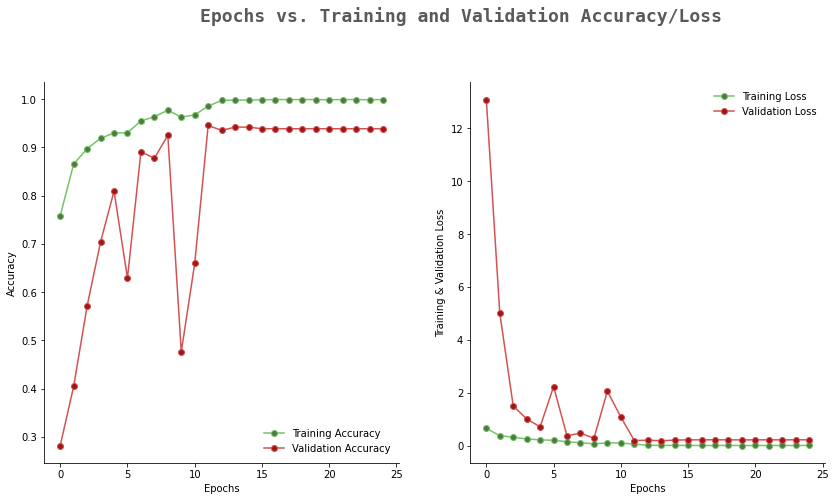

In [ ]:
epochs2 = [i for i in range(25)]
fig2, ax2 = plt.subplots(1,2,figsize=(14,7))
train_acc2 = history2.history['accuracy']
train_loss2 = history2.history['loss']
val_acc2 = history2.history['val_accuracy']
val_loss2 = history2.history['val_loss']

fig2.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax2[0].plot(epochs2, train_acc2, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax2[0].plot(epochs2, val_acc2, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax2[0].legend(frameon=False)
ax2[0].set_xlabel('Epochs')
ax2[0].set_ylabel('Accuracy')
sns.despine()
ax2[1].plot(epochs2, train_loss2, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax2[1].plot(epochs2, val_loss2, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax2[1].legend(frameon=False)
ax2[1].set_xlabel('Epochs')
ax2[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
train_dir = "/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Training"
test_dir = "/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing"

In [ ]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=(128,128),
                                                                 label_mode = "categorical",
                                                                 batch_size = 32
                                                                 )
test_data =tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size =(128,128),
                                                               label_mode = "categorical",
                                                               batch_size = 32
                                                               )

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [ ]:
#Evaluation befor tuning
pred_2 = model_2.predict(X_test)
pred_2 = np.argmax(pred_2,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 4s 139ms/step


In [ ]:
model_2.evaluate(X_test,y_test)

11/11 [==============================] - 1s 78ms/step - loss: 0.1345 - accuracy: 0.9602


[0.13451120257377625, 0.9602446556091309]

In [ ]:
print(classification_report(y_test_new,pred_2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        93
           1       0.98      0.94      0.96        51
           2       0.94      0.95      0.94        96
           3       0.96      0.99      0.97        87

    accuracy                           0.96       327
   macro avg       0.96      0.96      0.96       327
weighted avg       0.96      0.96      0.96       327



Colors for different intensity in confusion matrix

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

Plotting confusion matrix for ResNet152V2 model

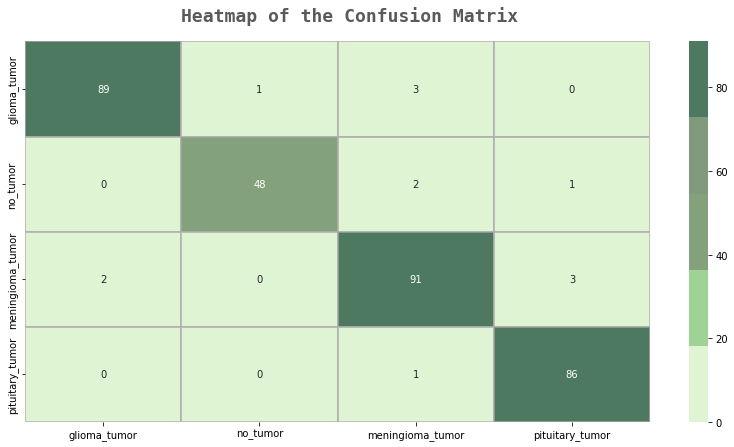

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred_2),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

Predicting of different types of brain tumor after implementing using ResNet152v2 model.

1/1 [==============================] - 0s 45ms/step


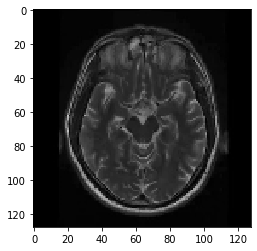

No brain Tumor./n {} 


In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/Brain_tumor_detection_using_MRI_images/Testing/no_tumor/image(104).jpg')
img2 = cv2.resize(img2,(128,128))
img_array2 = np.array(img2)
img_array2 = img_array2.reshape(1,128,128,3)

a1=model_2.predict(img_array2)
indices2 = a1.argmax()
plt.imshow(img2,interpolation='nearest')
plt.show()
if indices2 == 0:
  print("Brain Tumor is present. \nThe varient is Glioma Tumor ")
elif (indices2 == 2):
  print("Brain Tumor is present.\nThe varient is Meningioma Tumor ")
elif (indices2 == 1):
  print("No brain Tumor./n {} ")
else:
  print("Brain Tumor is present.\nThe varient is Pituitary Tumor ")
